<a href="https://colab.research.google.com/github/Polyakri/Spotify_Recommendation_System/blob/main/SpotifyRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Reading the dataset

In [2]:
csv_file_path = 'drive/MyDrive/dataset.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
df = df.dropna()
y= df['track_genre']

df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#Data Preprocessing

Split into train and test and use track genre as stratify

In [3]:
y= df['track_genre']
x= df.drop('track_genre', axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0, stratify=y
)
x_test_bkp = x_test
x_train_bkp = x_train

In [4]:

x_test['explicit'] = x_test['explicit'].map({False: 0, True: 1})
x_train['explicit'] = x_train['explicit'].map({False: 0, True: 1})
columns_to_drop = ['Unnamed: 0', 'artists','track_id', 'album_name', 'track_name', 'liveness', 'explicit', 'time_signature', 'mode']
x_test = x_test.drop(columns_to_drop, axis=1)
x_train = x_train.drop(columns_to_drop, axis=1)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

We cannot use genre because the same song has different genres and might confuse the model. The index number, track_id are irrelevant. The artist could theoretically help but there are many artists so I prefered to make my model less biased on the artists. Also the track name is irellevant. The album name will bias the model on recommending songs of the same album and I don't want to do this. The rest are results on trial and error on songs I chose.

#Plotting the SSE


I picked many k_values, I plotted the SSE per cluster and then the SSE drop for different k values

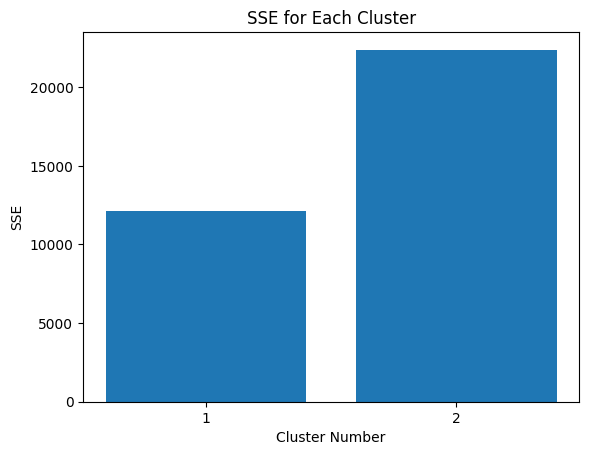

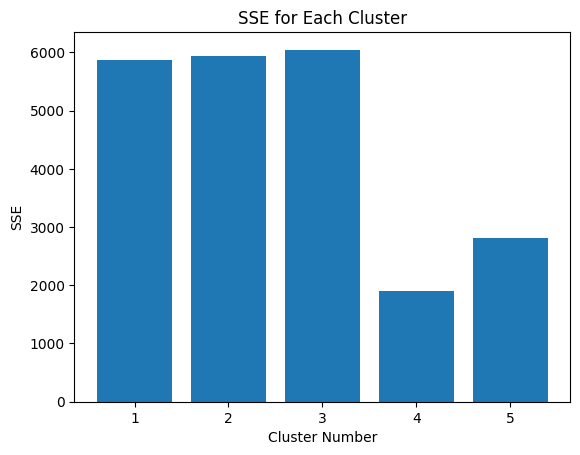

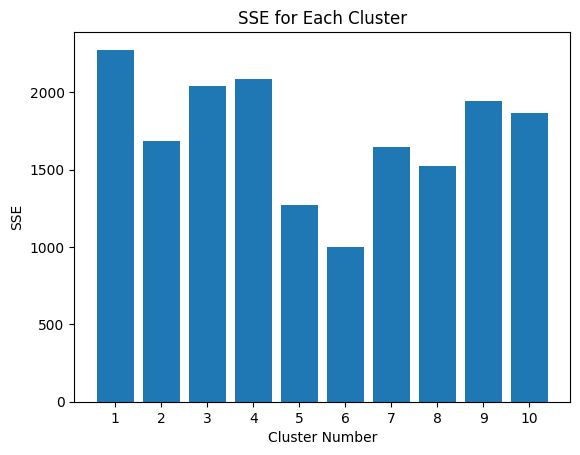

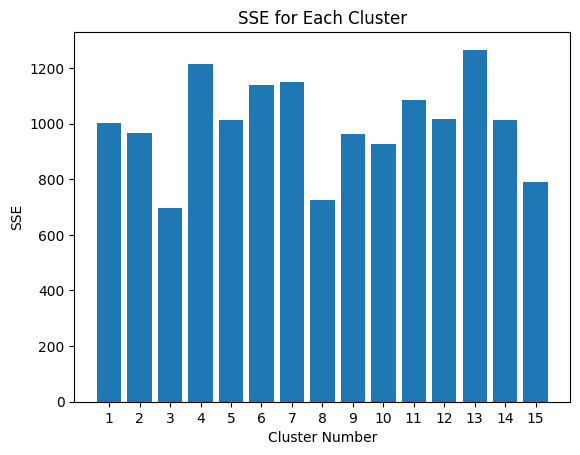

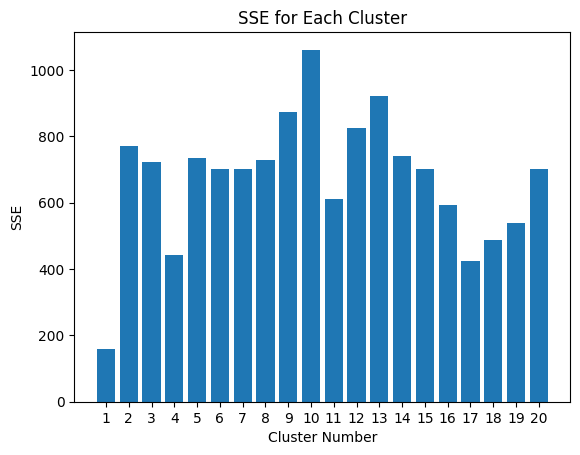

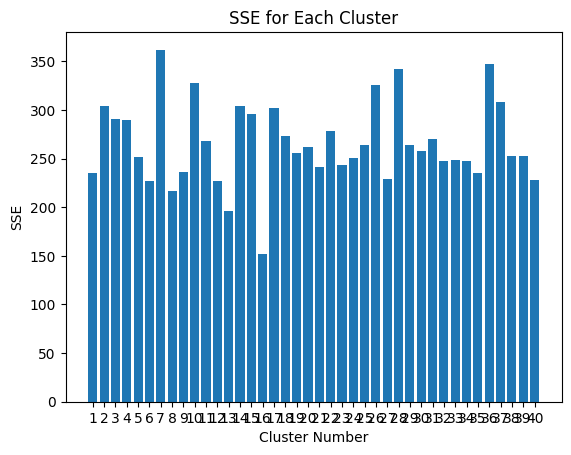

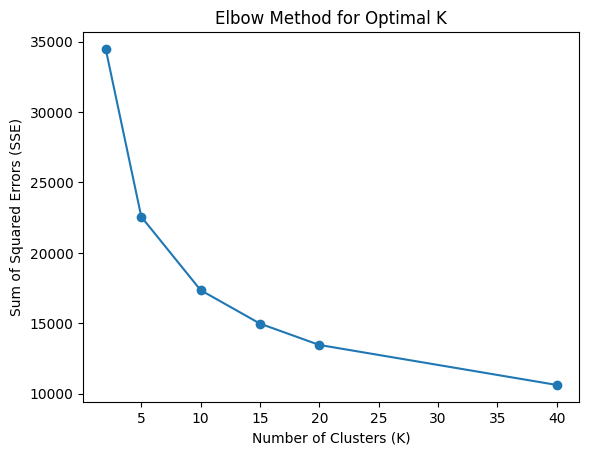

In [5]:
sse_values = []

results_list = []

k_values =  [2, 5, 10, 15, 20,40]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)

    start_time = time.time()

    # Fit the model to the data
    kmeans.fit(x_train)
    sse_values.append(kmeans.inertia_)
    # Record the end time
    end_time = time.time()


    sse_per_cluster = [np.sum((x_train[kmeans.labels_ == i] - kmeans.cluster_centers_[i]) ** 2) for i in range(k)]

    # Plot SSE for each cluster
    plt.bar(range(1, k + 1), sse_per_cluster, tick_label=range(1, k + 1))
    plt.xlabel('Cluster Number')
    plt.ylabel('SSE')
    plt.title('SSE for Each Cluster')
    plt.show()
    # Get the final cluster assignments and centroids
    cluster_assignments = kmeans.labels_
    centroids = kmeans.cluster_centers_
    y_pred = kmeans.predict(x_test)
    # Save results to the DataFrame

# Plot the SSE values
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

results_df = pd.DataFrame(results_list)

The 15 clusters, because there is the elbow point, there is no need to check for more k because the SSE drop will be less significant

#Recommendation system

Training and predicting the clusters for 15 clusters


In [6]:
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(x_train)
labels=kmeans.labels_

labels_test = kmeans.predict(x_test)

Instead of Randomly picking one song I chose one I know so I can compare the recommended list

In [10]:
result_df = x_train_bkp[x_train_bkp['track_name'] == 'Pepas']
print (result_df.iloc[0])
result_df = result_df.head(1)
result_df = result_df.drop(columns=columns_to_drop)
result_df = scaler.transform(result_df)
pred_label = kmeans.predict(result_df)
result_df = result_df.flatten()


matching_indices = np.where(labels == pred_label)[0]


# Now you can use these indices to access the corresponding rows in x_train
matching_rows = x_train[matching_indices]
distances = [distance.euclidean(result_df, row) for row in matching_rows]

# Create a DataFrame with the distances and corresponding indices
dist_df = pd.DataFrame({'Index': matching_indices, 'Euclidean Distance': distances})

# Display the DataFrame
dist_df = dist_df.sort_values(by='Euclidean Distance')


dist_df_full = pd.DataFrame()

for index in (dist_df['Index']):
  row_to_append = x_train_bkp.iloc[index]
  euclidean_distance = dist_df.loc[dist_df['Index'] == index, 'Euclidean Distance'].values[0]
  row_to_append['Euclidean Distance'] = euclidean_distance
  row_to_append['Cluster']=labels[index]
  dist_df_full = dist_df_full.append(row_to_append, ignore_index=True)

dist_df_full = dist_df_full.drop_duplicates(subset='track_id', keep='first')
dist_df_full = dist_df_full.drop_duplicates(subset=['artists', 'track_name'], keep='first')
dist_df_full = dist_df_full[dist_df_full['Euclidean Distance'] != 0]
dist_df_full.head(11)



Unnamed: 0                           89611
track_id            2B4GHvToeLTOBB4QLzW3Ni
artists                            Farruko
album_name                          La 167
track_name                           Pepas
popularity                              74
duration_ms                         287120
explicit                                 1
danceability                         0.762
energy                               0.766
key                                      7
loudness                            -3.955
mode                                     1
speechiness                         0.0343
acousticness                       0.00776
instrumentalness                   0.00007
liveness                             0.128
valence                              0.442
tempo                              130.001
time_signature                           4
Name: 89611, dtype: object


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Euclidean Distance,Cluster
2,31082,4uDhts78RdwIDjEqPrYVKp,Alan Walker;Imanbek,Sweet Dreams,Sweet Dreams,75,138819,0,0.766,0.817,...,1,0.0350,0.02390,0.000002,0.1590,0.430,125.033,4,0.066178,1
3,53254,4xMbBESczlHPUO8QeYi56p,Becky Hill;Topic,My Heart Goes (La Di Da) (feat. Topic),My Heart Goes (La Di Da) (feat. Topic),75,148960,0,0.695,0.781,...,0,0.0452,0.01850,0.000031,0.2950,0.456,124.040,4,0.087255,1
7,91456,5yDL13y5giogKs2fSNf7sj,The Wanted,Battleground (Deluxe Edition),Glad You Came,79,197935,0,0.722,0.851,...,0,0.0639,0.03190,0.000000,0.1080,0.452,126.885,4,0.116053,1
11,31961,4nvGIQPgLnWWJUJrnRsIOX,blackbear;Machine Gun Kelly,in loving memory,gfy (with Machine Gun Kelly),69,174066,1,0.744,0.732,...,1,0.0522,0.02640,0.000000,0.3520,0.387,121.086,4,0.134577,1
12,30114,18asYwWugKjjsihZ0YvRxO,Tiësto;Ava Max,The Motto,The Motto,86,164818,0,0.754,0.763,...,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,4,0.136793,1
16,68975,0RGpd5zCowfEItCUF7Itpr,Farruko,Nazareno,Nazareno,75,223173,1,0.658,0.725,...,0,0.0321,0.02920,0.000107,0.1630,0.368,128.117,4,0.139065,1
17,107105,0SyxZC4wlqAwf20cHE6Xon,La Roux;GAMPER & DADONI,Bulletproof,Bulletproof,70,162213,0,0.752,0.771,...,1,0.0311,0.00341,0.000017,0.0905,0.527,126.020,4,0.139773,1
18,56912,6XcfKZvJio9Z0fQy11GnNX,lovelytheband,finding it hard to smile,broken,70,204878,0,0.666,0.728,...,1,0.0419,0.00175,0.000004,0.0429,0.510,122.996,4,0.140040,1
19,37454,2wVQcA1YCuGL6EW0QbgVoV,Clean Bandit;A7S,Everything But You (feat. A7S),Everything But You (feat. A7S),70,198014,0,0.679,0.764,...,1,0.0391,0.03100,0.000009,0.0951,0.471,124.977,4,0.140553,1
20,88906,1bFgMkoazsyZGSflpCzYm6,Farruko;Tiësto,Pepas (Tiësto Remix),Pepas - Tiësto Remix,70,223384,1,0.769,0.688,...,1,0.0501,0.00215,0.107000,0.0880,0.387,130.026,4,0.150800,1


This recommendations seem very good. It is indeed what I like to hear.

I will pick a random song from each cluster and show the 3 closest to it

In [8]:
for cluster in range (20):
  print(f"/------------------------------------Cluster {cluster}--------------------------------------------/")

  matching_indices = np.where(labels == cluster)[0]
  matching_pred = np.where(labels_test ==cluster)[0]
  random_index = np.random.choice((matching_pred))
  matching_rows = x_train[matching_indices]

  row_test = x_test [random_index]

  row_full =x_test_bkp.iloc[random_index]
  print(row_full)
  distances = [distance.euclidean(row_test, row) for row in matching_rows]
  print(matching_indices.shape)
  print (len(distances))
  # Create a DataFrame with the distances and corresponding indices
  dist_df_cluster = pd.DataFrame({'Index': matching_indices, 'Euclidean Distance': distances})

  # Display the DataFrame
  dist_df_cluster = dist_df_cluster.sort_values(by='Euclidean Distance')


  dist_df_full = pd.DataFrame()

  for index in (dist_df_cluster['Index']):
    row_to_append = pd.DataFrame(x_train_bkp).iloc[index]
    euclidean_distance = dist_df_cluster.loc[dist_df_cluster['Index'] == index, 'Euclidean Distance'].values[0]
    row_to_append['Euclidean Distance'] = euclidean_distance
    row_to_append['Cluster']=labels[index]
    dist_df_full = dist_df_full.append(row_to_append, ignore_index=True)

  dist_df_full = dist_df_full.drop_duplicates(subset='track_id', keep='first')
  dist_df_full = dist_df_full.drop_duplicates(subset=['artists', 'track_name'], keep='first')
  dist_df_full = dist_df_full[dist_df_full['Euclidean Distance'] != 0]

  print (dist_df_full.iloc[0])
  print ()
  print (dist_df_full.iloc[1])
  print ()
  print (dist_df_full.iloc[2])
  print ()

/------------------------------------Cluster 0--------------------------------------------/
Unnamed: 0                           18863
track_id            6DPl2JQGyXlACUgi90WHfV
artists                         Marc Maron
album_name                     Thinky Pain
track_name                      Born a Jew
popularity                              20
duration_ms                         178494
explicit                                 1
danceability                         0.623
energy                               0.688
key                                     11
loudness                           -10.743
mode                                     0
speechiness                          0.943
acousticness                         0.925
instrumentalness                       0.0
liveness                             0.889
valence                              0.533
tempo                               69.634
time_signature                           3
Name: 18863, dtype: object
(663,)
663
Unnamed: 0